# Chapter 7: n-step Boostrapping

Here we unify one-step TD and monte carlo methods into a spectrum, with each being at opposite ends of the spectrum. The best methods are often somewhere in the middle.
 
We are freed from "the tyranny of the time step". What's meant by this is we want a trade between wanting to update online frequently, but we also want to update our values with meaningful state changes. In Monte carlo, we don't get frequent updates, and in one-step TD our state changes may not be significantly meaninful. n-step allows us to bootstrap over multiple timesteps.

In chapter 12 we'll learn about *eligibility traces*, which will allow us to update bootstrap multiple states simultaneously. But for now we focus on the n-step bootstrapping idea alone. 

## 7.1 n-step TD Prediction

The use of state values in TD essentially is a proxy for the remaining rewards.

N-step updates are considered TD methods because they still make updates based on how an estimate differs from a previous estimate.

Let's get a look at what the updates look like for n-step TD. We'll start with 2-step TD:

$$
G_{t:t+2}\doteq R_{t+1}+\gamma R_{t+2} + \gamma^2 V_{t+1}(S_{t+2})
$$

Here, $\gamma^2V_{t+1}(S_{t+2})$ acts as our proxy for the remaining rewards. 

Then, the general formula for n-step:

$$
G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1}(S_{t+n})
$$

This is done for all n, t such that $n \geq 1$ and $0 \leq t < T - n$. If $t+n\geq T$, so t+n goes beyond matches or goes beyond termination, then these missing terms are just set to 0 (so our return is equal to the ordinary full return).

Notice how we start subscripting the value functions with t. I believe we use this, because we're using the state value at time t, so it sort of indicates how we only make updates once we reach t+n. Because we need to see the reward t+n. We also only have access to our state value at t+n-1, because we're going to calculate the new V, $V_{t+n}$.

$$
V_{t+n}(S_t)\doteq V_{t+n-1}(S_t) + \alpha [G_{t:t+n} - V_{t+n-1}(S_t)], \ 0 \leq t < T
$$

We only make changes n-1 steps into the episode (we start counting from 0), but this is made up for by n-1 steps after the episode terminates (and before the next episode).



Execrcise 7.1:

Need to show that
$$
G_{t:t+n}-V_{t+n-1}(S_t) = \sum^{t+n}_{k=t}\gamma^{k-t}\delta_k
$$

Definition of a TD error
$$
\delta_k \doteq R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
$$

First step. We can remove V time subscripts because in this case the value estimates don't change.
$$
G_{t:t+n}-V(S_t)= R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V(S_{t+n}) - V(S_t)
$$

We'll add the discounted $\gamma V(S_{t+1})$ like in the original proof
$$
G_{t:t+n}-V(S_t)= R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V(S_{t+n}) - V(S_t) + \gamma V(S_{t+1}) - \gamma V(S_{t+1})
$$

Now group it into a TD error
$$
G_{t:t+n}-V(S_t)= \delta_k + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V(S_{t+n}) - \gamma V(S_{t+1})
$$

So for $\delta_{k+1}$ we need:
$$
\delta_{k+1} = R_{t+2} + \gamma^2 V(S_{t+2}) - V(S_{t+1})
$$

We can factor out gamma:
$$
G_{t:t+n}-V(S_t)= \delta_k + \gamma(R_{t+2} + ... + \gamma^{n-2} R_{t+n} + \gamma^{n-1} V(S_{t+n}) - V(S_{t+1}))
$$

Now I we do our adding trick again
$$
G_{t:t+n}-V(S_t)= \delta_k + \gamma(R_{t+2} + ... + \gamma^{n-2} R_{t+n} + \gamma^{n-1} V(S_{t+n}) - V(S_{t+1}) + \gamma V(S_{t+2}) - \gamma V(S_{t+2}))
$$

Now group again
$$
G_{t:t+n}-V(S_t)= \delta_k + \gamma \delta_{k+1} + \gamma^2(R_{t+3} + ... + \gamma^{n-2} R_{t+n} + \gamma^{n-1} V(S_{t+n}) - \gamma V(S_{t+2}))
$$

Now this is just repeated until t=n
$$
G_{t:t+n}-V(S_t)= \delta_k + \gamma \delta_{k+1} + ... + \gamma^{n-1} \delta_{k+n-1} + \gamma^n(R_{t+n}+V(S_{t+n}) - V(S_t))
$$

Finally:
$$
G_{t:t+n}-V(S_t)= \delta_k + \gamma \delta_{k+1} + ... + \gamma^{n-1} \delta_{k+n-1} + \gamma^n \delta_{k+n} = \sum^{t+n}_{k=t}\gamma^{k-t}\delta_k
$$


In [ ]:
# Exercise 7.2: TO-DO Later. 

Here we have the full algorithm:

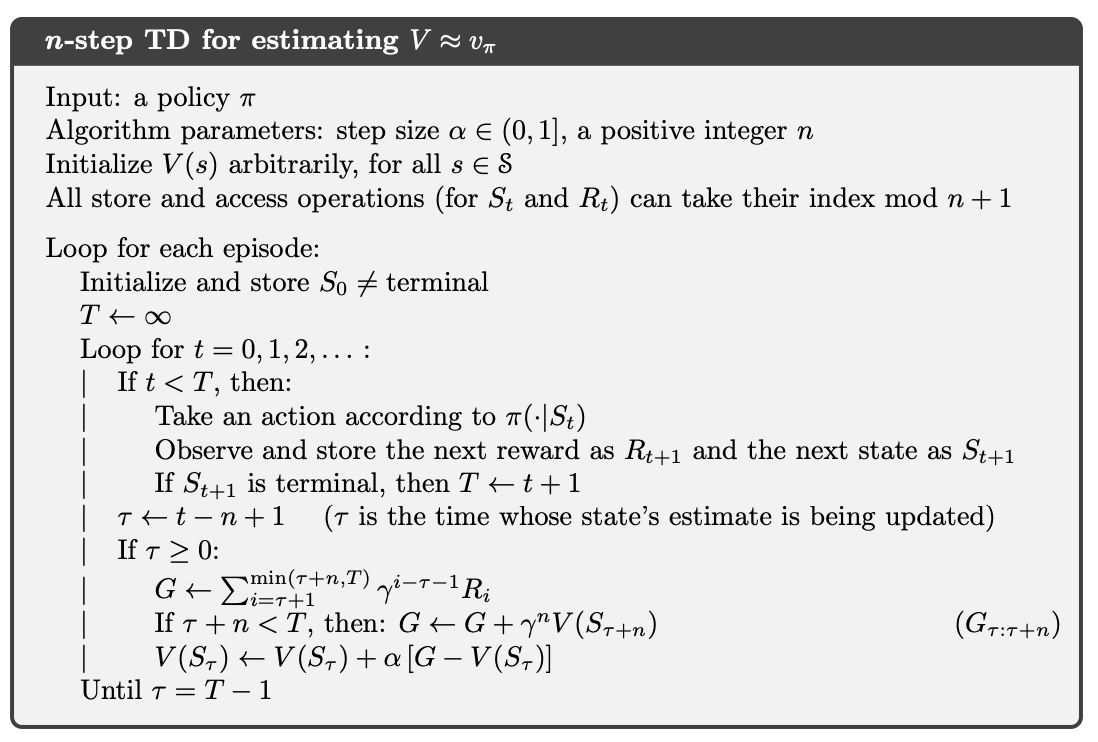

- An important property of using n-step returns ($G_{t:t+n}(S_t)$) is that the expected estimate is guarenteed to be a better estimate of $v_{\pi}$ than $V_{t+n-1}$ in the worst case. 

- More precisely, the worst error of the n-step return is guarenteed to be less than or equal to $\gamma^n$ times the worst error under $V_{t+n-1}$:

$$
\max_s|\mathbb{E}_{\pi}[G_{t:t+n}|S_t=s]-v_{\pi}(s)|\leq\gamma^n \max_s|V_{t+n-1}(s)-v_{\pi}(s)|
$$

This looks a little confusing at first. So I'll explain it a bit.

- Our left side is our n-step return. So this includes our series of n discounted rewards plus the discounted bootstrapped value for $V_{t+n-1}(S_{t+n})$. We take the max absolute value for this error over all states.

- Our right side by contrast is another error where it's the estimated value for s at time t+n-1 take the true state value. It's the tail of our n-step return, so we need to make sure it's discounted, that's why we have $\gamma^n$. 

This property is known as the *error reduction property* of n-step returns. It essentially proves formally that TD methods converge to correct predictions given the correct conditions. So n-step methods, including one-step TD and Monte Carlo, are a subset of a family of sound methods.

What I think this is basically saying is that our new estimate based on our n-step return will be better than our old estimate. It's in the worst case, and that's why we use the expected n-step return rather than the actual returns.

Exercise 7.3:

Having 19 states instead of 5 would encourage, more like force, the scenario to have longer episodes. Shifting the size of the walk would likely change the optimal value of n. I believe this is because having a larger average episode length would likely shift the optimal n. This is because of the trade-off between TD(0) and monte carlo, and shifting the n affects the trade-off. For example, if it were a shorter episode length, like in the 5-walk, then even small values of n, like 8, may make it much more monte carlo than TD(0). In contrast, increasing the size of the walk to say, 100, this same value of n would sit much further to the TD(0) side. So essentially, the optimal n sits somewhere in the middle of the TD(0)-Monte Carlo spectrum, and this spectrum will change in size depending on the average size of hte episode, so increasing or decreasing it would also change the best n value that both captures meaninful updates and having a good update frequency.

Changing the left-side outcome to -1 may have changed the best value of n as it changes the environment dynamics. Any change in the enviornment dynamics would likely affect the optimal n value in some way. But if it's very small, than it may not change the value of n because it's discrete, but it may slightly shift it in the direction of a different n value.

## 7.2 n-step Sarsa

- Differs from one-step sarsa. So that version of Sarsas is now known as *one-step Sarsa*, or *Sarsa(0)*
- Very similar to n-step prediction, just swap the state-values for action-values and use an epsilon greedy policy:
$$
G_{t:t+n}\doteq R_{t+1} + \gamma^2 R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}), \ n \geq 1, 0 \leq t < T-n
$$

- If t+n is $\geq$ than T, then we just use the full return: $G_{t:t+n}\doteq G_t, t+n\geq T$

Our update rull then naturally becomes:
$$
Q_{t+n}(S_{t}, A_{t}) = Q_{t+n-1}(S_{t}, A_{t}) + \alpha [G_{t:t+n}-Q_{t+n-1}(S_t, A_t)], 0\leq t < T
$$

And here we have the full algorithm:
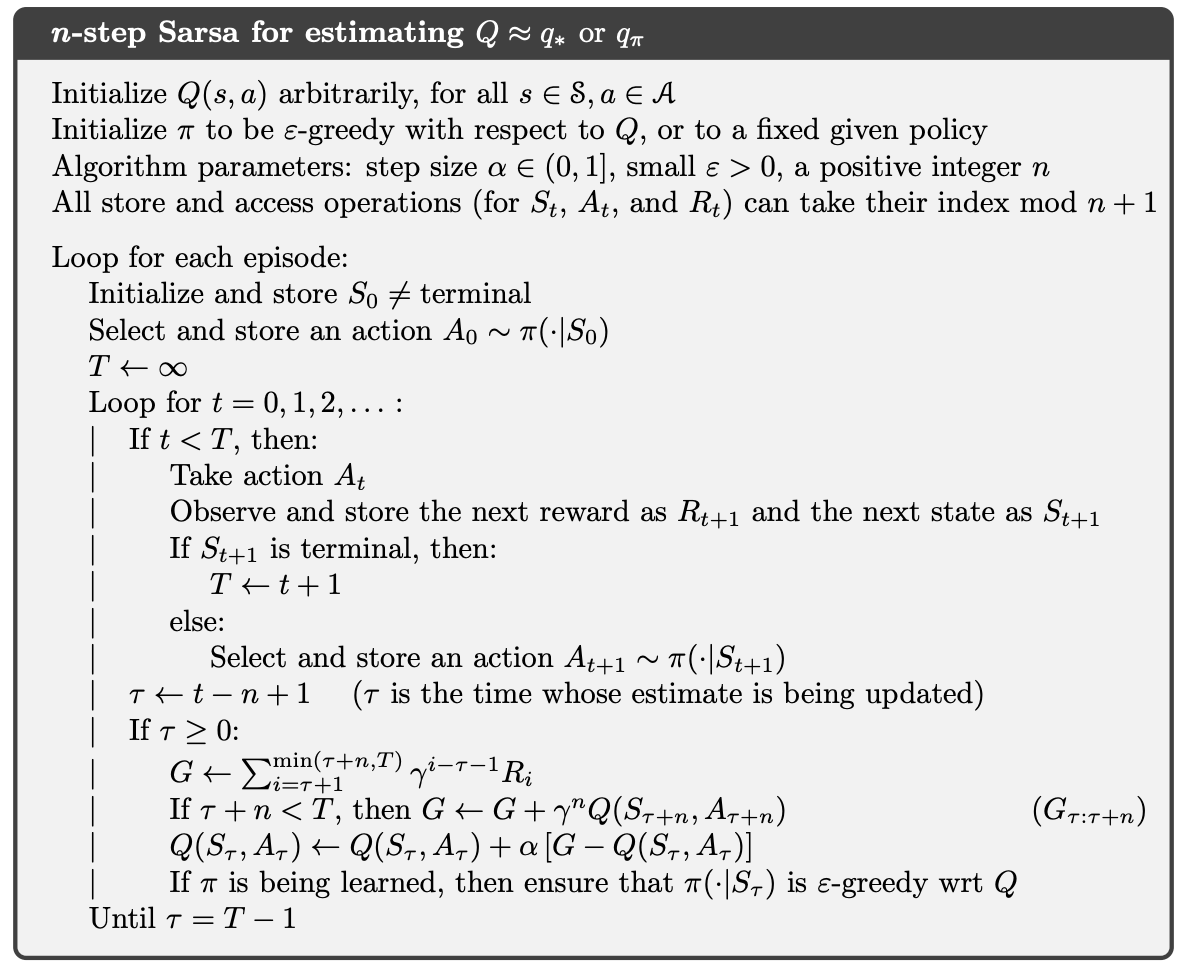


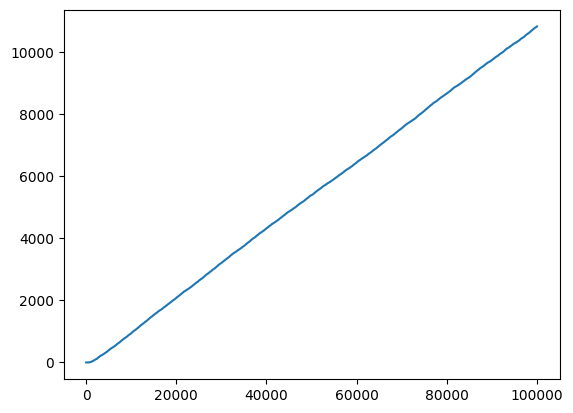

In [ ]:
# Grid world n-step sarsa from Figure 7.4
import numpy as np
import matplotlib.pyplot as plt

class Gridworld:
    def __init__(self, x, y):
        self.gridworld = np.zeros((x, y))
        self.x_border, self.y_border = x, y
        self.goal = np.array([4, 6])
        self.start = np.array([4, 1])
        self.pos = self.start.copy()
        self.actions = np.array([[0, -1], [-1, 0], [0, 1], [1, 0]])

    def reset(self):
        self.pos = self.start.copy()

    def step(self, action_idx):
        self.pos += self.actions[action_idx][0] # Apply Action

        # Apply borders
        if self.pos[0] < 0:
            self.pos[0] = 0
        if self.pos[0] >= self.x_border:
            self.pos[0] = self.x_border-1
        if self.pos[1] < 0:
            self.pos[1] = 0
        if self.pos[1] >= self.y_border:
            self.pos[1] = self.y_border-1

        if (self.pos==self.goal).all():
            reward = 1
        else:
            reward = -1

        return (self.pos.copy(), reward)

    def get_state(self):
        return self.pos.copy()
    
def pick_action(actions, dist):
    return np.random.choice(actions, 1, p=dist)

def update_policy(policy_dist: np.array, q_values: np.array, 
                  epsilon: float, a_count: int):
    
    #if not (policy_dist==1/4).all():

    best_a = np.argmax(q_values)

    

    policy_dist[:] = 0
    policy_dist[best_a] = 1-epsilon 
    policy_dist[:] += epsilon/a_count 


def n_step_sarsa(policy: np.array, alpha: float, epsilon: float, 
                 max_timesteps: int, env: Gridworld, n: int,
                 gamma: float):
    q_values = np.zeros((len(policy), len(policy[0]), 4), dtype=np.float64)
    actions = np.array([0, 1, 2, 3])
    discount_vector = np.array([gamma**x for x in range(n)])
    ep_count = 0
    timestep = 0
    ep_count_hist = []
    timestep_hist = []

    while timestep < max_timesteps:
        s = env.get_state()
        a = pick_action(actions, policy[*s])
        T = np.inf 
        t = 0
        episode_done = False 
        r_queue = []
        s_list = [s]
        a_list = [a]

        while not episode_done:
            if t < T: 
                s_n, r = env.step(a)
                s_list.append(s_n)
                r_queue.append(r)

                if r == 1:
                    T = t+1
                    env.reset()
                else:
                    a_n = pick_action(actions, policy[*s_n])
                    a_list.append(a_n)
            
            tau = t-n+1 

            if tau >= 0:
                G = np.dot(np.array(r_queue), discount_vector[:len(r_queue)])

                if tau + n < T:
                    G += gamma**n * q_values[*s_n, a_n]

                q_values[*s_list[tau], a_list[tau]] += alpha * (G - q_values[*s_list[tau],  a_list[tau]])

                update_policy(policy[*s_list[tau]], q_values[*s_list[tau]], epsilon, len(actions))

                r_queue.pop(0)

            s = s_n 
            a = a_n

            if tau == T-1:
                episode_done = True
                ep_count += 1

            ep_count_hist.append(ep_count)
            timestep_hist.append(timestep)
            t += 1
            timestep += 1
        
    return ep_count_hist, timestep_hist

X, Y = 8, 10
policy = np.zeros((X, Y, 4)) + 1/4
ALPHA = 0.5
EPSILON = 0.2
MAX_TIMESTEPS = 100_000
environment = Gridworld(X, Y)
n = 2
GAMMA = 1

ep_count_hist, timestep_hist = n_step_sarsa(policy, ALPHA, EPSILON, MAX_TIMESTEPS, environment, 
             n, GAMMA)


plt.plot(timestep_hist, ep_count_hist)
plt.show()


Exercise 7.4

n-step Return of sarsa
$$
Q_{t+n}(S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha [G_{t:t+n}-Q_{t+n-1}(S_t, A_t)]
$$
And we want to prove:
$$
G_{t:t+n} = Q_{t-1}(S_t, A_t) + \sum^{\min(t+n, T)-1}_{k=t} \gamma^{k-t}[R_{k+1} + \gamma Q_k(S_{k+1},A_{k+1})-Q_{k-1}(S_k, A_k)]
$$
So our novel TD Error is:
$$
\delta_{k}=R_{k+1}+\gamma Q_k(S_{k+1},A_{k+1})-Q_{k-1}(S_k,A_k)
$$

We can prove this by using a algebra technique called "telescoping". This is when we write out a long term, then cancel out all the like terms, much like a telescope being folded up, leaving us with the important bits.

A key part of this proof is the following identity:
$$
\gamma Q_k(S_{k+1}, A_{k+1}) = \gamma Q_{k-1}(S_{k+1}, A_{k+1})+\gamma [Q_k(S_{k+1}, A_{k+1})-Q_{k-1}(S_{k+1},A_{k+1})]
$$

Here we add and subtract: $\gamma Q_{k-1}(S_{k+1}, A_{k+1})$. This is our previous estimate for the Q value for $S_{k+1} \ and \ A_{k+1}$. This is pretty much exactly what we did for the state-value proof of the Monte Carlo error. Except we switch it to Q values and instead of estimates for different states, its estimates for the same state-action pair, just different over time.

So now what we do is we re-write our usual n-step return with the identity many times:
$$
G_{t:t+n}=R_{t+1}+\gamma R_{t+2}+...+\gamma^{n-1}R_{t+n}+\gamma^nQ_{t+n-1}(S_{t+n}, A_{t+n})

\\

= Q_{t-1}(S_t, A_t)

\\

+ [R_{t+1} + \gamma Q_t(S_{t+1}, A_{t+1}) - Q_{t-1}(S_t, A_t)] \\
+ \gamma [R_{t+2} + \gamma Q_{t+1}(S_{t+2}, A_{t+2}) - Q_t(S_{t+1}, A_{t+1})] \\
+ \gamma^2 [R_{t+3} + \gamma Q_{t+2}(S_{t+3}, A_{t+3} - Q_{t+1}(S_{t+2}, A_{t+2}))] \\ 
+ ... \\ 
+ \gamma^{n-1}[R_{t+n} + \gamma Q_{t+n-1}(S_{t+n}, A_{t+n}) - Q_{t+n-2}(S_{t+n-1}, A_{t+n-1})] \\ 
+ \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}) + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n})

$$

I'm gonna focus a bit more on the intuition. It's basically saying that our expected return is just the sum of rewards plus the sum of the one step difference in Q values in terms of both time and state space.

We can also make an expected sarsa variant of our n-step sarsa. This just involves using an *expected approximate value* of state $s_{t+n}$ instead of the approximate value of our last state-action pair:

$$
G_{t:t+n}\doteq R_{t+1} + ... + \gamma^{n-1}R_{t+n} + \gamma^n \bar{V}_{t+n-1}(S_{t+n}), t + n < T
$$

Where $\bar{V}_t(s)$ is:

$$
\bar{V}_t(s)\doteq \sum_a\pi(a|s)Q_t(s,a), \text{for all s}\ \in S
$$

This expected approxiamte value is used in many of the other action-value methods used in the book. Of course, if s is terminal, then $\bar{V}_t(s)$ will be 0.

## n-step Off-policy learning

Like previous off-policy methods (except q-learning), we use an *importance sampling ratio*. However we don't use it in exactly the samem way. Recall that previously we used the importance sampling ratio over the entire return. What we do here is modify it in a similar way to discounting aware important sampling. What's meant by this is that instead of using all the individual importance sampling ratio from t to T, we just use t to n.

So our state-value update looks like:
$$
V_{t+n}(S_t)\doteq V_{t+n-1}+\alpha \rho_{t:t+n-1}[G_{t:t+n}-V_{t+n-1}(S_t)], \ 0 \leq t < T
$$

Where $\rho_{t:t+n-1}$ is our importance sampling ratio which captures the relative probability of taking n action over two policies:

$$
p_{t:h}\doteq\prod^{\min(h,T_1)}_{k=t}\frac{\pi(A_k|S_k)}{b(A_k|S_k)}
$$

Like before, our importance sampling ratio helps us by weighting our n-step sarsa update by how likely it is under $\pi$ compared to the behaviour policy b. So if the likelihood is low, $\rho$ will reflect that and make the error term very small, and so the change will be minimal (even 0 if any of the terms are 0). In contrast if the trajectory is much more likely in our target policy, then the importance sampling ratio will overweight the error to compensate.

We can adjust our sarsa update to be off-policy be simply adding the importance sampling ratio like so:
$$
Q_{t+n}(S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha \rho_{t+1:t+n} [G_{t:t+n}-Q_{t+n-1}(S_t, A_t)]
$$

It's important to note here that $\rho$ starts from t+1. This is because we're using state-action pairs, so our first action t has already been determined and so we don't have to care about it, only about what happens after.

Here we have the pseudocode:

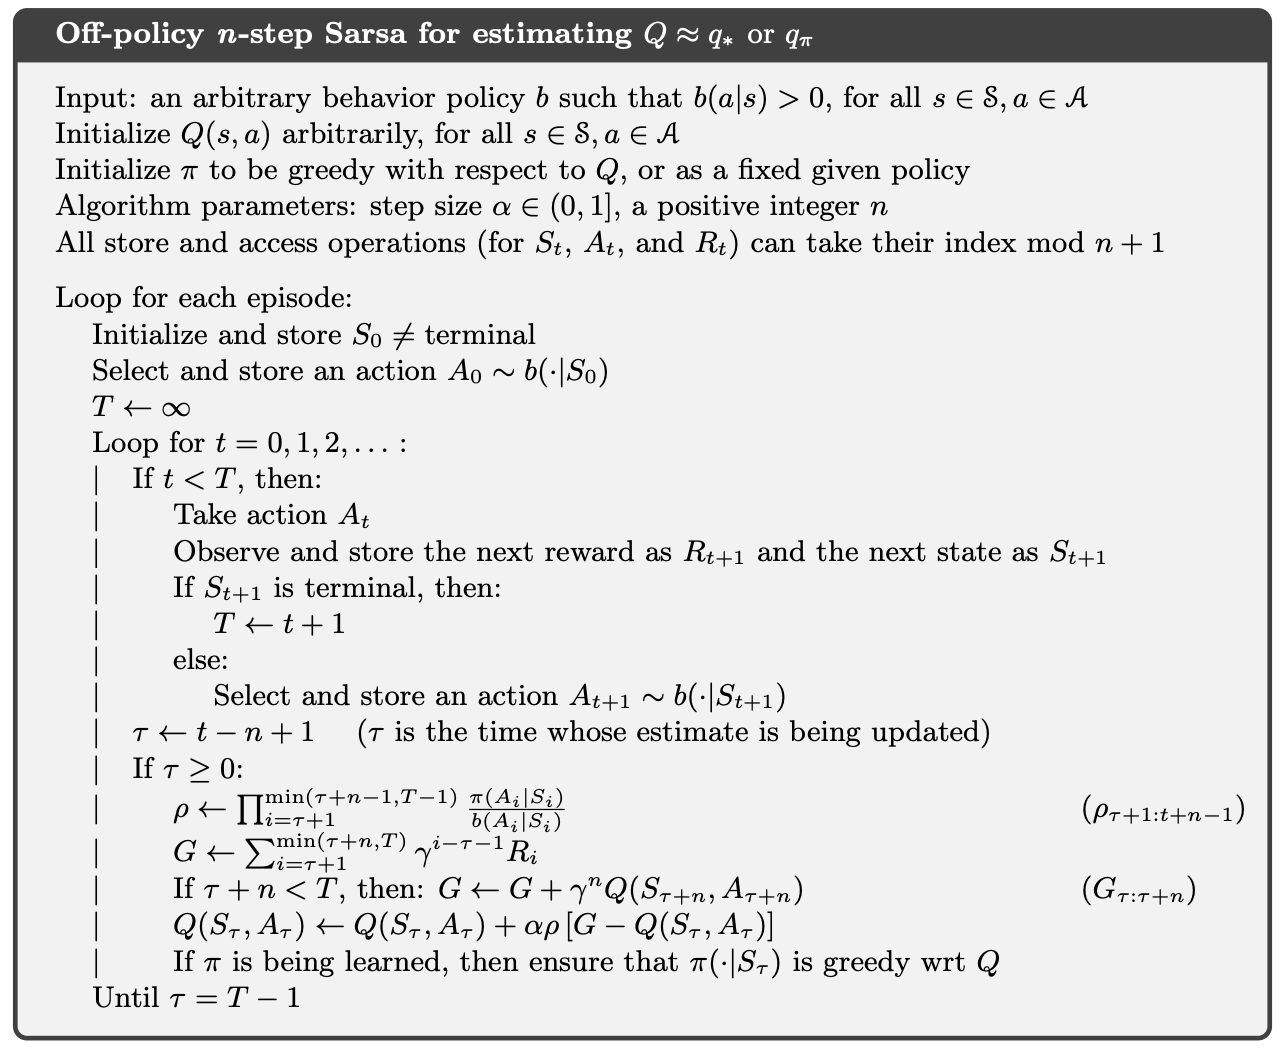


We can adjust this policy to be Expected Sarsa too. This would involve slightly modifying the importance sampling ratio to have one less factor: $\rho_{t+1:t+n-1}$. We do this because we're using the last approximate state-value essentially, so all actions are taken into account.

## 7.4 *Per-decision Methods with Control Variates

A downside of the previous off-policy methods is it's high variance. But we can mitigate this issue by adding some complexity. To begin, we need to remember how the n-step return can be written recursively in terms of h, the horizon:
$$
G_{t:h}=R_{t+1}+\gamma G_{t+1:h}, t<h<T,
$$
And $G_{h:h}\doteq V_{h-1}(S_h$).

So in the above example, if the probability of taking the next action is 0 under $\pi$, then this whole n-step return will be 0. This would then slightly decrease our estimate, which may be inaccurate, increasing variance. That's when we multiply the whole right side by the importance sampling ratio. 

But we can do better. Here's our better approach:

$$
G_{t:h}\doteq\rho_t(R_{t+1}+\gamma G_{t+1:h})+(1-\rho_t)V_{h-1}(S_t), t<h<T,
$$

What this does is essentially allows us to ignore samples that have a probability of 0 under the target. This can be illustrated clearly by an example. If $rho_t$ were 0, then the n-step return becomes 0, however the right part of our right hand expression will become important. $1-\rho_t$ becomes 1, and $V_{h-1}(S_t)$ is just our old estimate! So the error will be 0 and it will be essentially ignored. 

This additional term in the above equation is known as a *control variate*. It can be quite useful in reducing variance. A theroetical property that's important to note is that the control variate actually doesn't change our expected update at all. This is because the importance sampling ratio has an expected value of 1 (see monte carlo chapter). Thus our control variate has an expected value of 0. 

It's important to note that this formula is recursive. So the use of the control variate is used for each timestep up until $G_{h:h}$. This does make the calculation a bit more tricky, and a bit more similiar to how G was implemented in monte carlo algorithms.

Exercise 7.5

    # This is pseudocode for off-policy n-step TD prediction using a control variate
    # This should be roughyl correct


    Inputs:
    b - Behaviour policy with coverage of policy pi 
    pi - Target policy 
    alpha - Float between 0-1 (inclusive)
    n - Positive integer 
    gamma - Float between 0-1 (inslusive)
    V(s) - Arbitrarily initialised float for all s in S 


    Loop forever 
        Generate MDP trajectory # (S_0, A_0, R_1, S_1, A_0, ..., S_T-1, A_T_1, R_T-1, S_T)
        T <- max(t)
        rho_queue <- []
        Loop for t = 0, 1, 2, ...:
            tau <- t - n + 1
            rho_queue.append(pi(A_tau|S_tau)/b(A_tau|S_tau))
            if tau >= 0:
                G <- 0 
                if tau+n<T:
                    G = V(S_{tau+n})
                for i=n-1 down to 0:
                    G <- G + (rho_{tau+n}(R_{tau+n} + gamma * G) + (1 - rho_{tau+n})V(S_t))

                V(S_tau) <- V(S_tau) + alpha * (G - V(S_tau))

        Until tau = T - 1 

When we want to implement control variates with q-values we do need to adjust this slightly. For one, the first action no longer plays a role in the importance sampling because we've already taken it. So we only apply importance sampling to the actions after it.

We also need to adjust our bootstrapping term. If we think about it, if we used our bootstrapping term from the state-value variant, it woudln't really make sense because if we were to use the q value based on what action b would take, it may be inaccurate as we haven't actually taken that action yet. So this could give us the wrong action at t+h, even if we weight it by it's corresponding importance sampling ratio.

So, instead, we use the approximate state-value from n-step expected sarsa. Our off-policy form with control variate for q values looks like:

$$
G_{t:h}\doteq R_{t+1}+\gamma (\rho_{t+1}G_{t+1:h}+\bar{V}_{h-1}(S_{t+1})-\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1}))

\\

= R_{t+1}+\gamma \rho_{t+1}(G_{t+1:h}-Q_{h-1}(S_{t+1},A_{t+1}))\gamma \bar{V}_{h-1}(S_{t+1}), t<h\leq T
$$

This is far less simple than the state-value version. 

In a way we're atually computing two errors. The first here is the every step return-q-value error: $G_{t+1:h}-Q_{h-1}(S_{t=1},A_{t+1})$, and of course the actual q-value update that uses the return. This first error is the control variate error. So if $\rho$ is 0, this value will be 0 and it falls back to the expected q-value, just like in the state-value version. And if $\rho$ is above 0, then we can take advantage of this step under the behaviour trajectory. 

It's interesting to note that we don't use the $1-\rho$ term like in the state-value version. This is actually a natural extension but doesn't work due to it adding a bias. This comes down to what we're conditioning the expectation on. Because when it comes down to it, Q values are fundamentally just the expectation $\mathbb{E}[G_{t:h}|S_t=s,A_t=a]$. Because this method is off-policy it complicates this expectation because we may be trying to find the q value for an action that's impossible under the target policy (though not under the behaviour policy). But because we've taken it, we need to continue with it anyway in case there's important information further in the trajectory. So if we were to use the naive approach here and $\rho_{t+1}$ were 0, then we'd replace that part of the recursive return with $\bar{V}(S_{t+1})$, but this value assumes that we'd take this trajectory under $\pi$ which isn't possible if the state-action that got us there was not possible. 

Both $G_{t+1:h}$ are $Q_{h-1}(S_{t+1}, A_{t+1})$ are trying to approximate $Q_{h}(S_t, A_t)$. But they have distinct properties. G here has a higher variance and a lower bias, while Q has the opposite, a lower variance but potentially biased. But subtracting the two, we get a residual error. This is then multipled by our high variance $\rho$ value. This term is then added to our baseline $\bar{V}(S_t)$ value, which is completed unbiased.

This expression works fundamentally differently to the state-value term. We essentially have 3 estimates for the return. And they each serve a purpose. 

Exercise 7.6

Honestly I don't know how to go about this from scratch, so I'll just try to understand the answer.

Our first step is to actually undertsand what part of the above action-value return is actually the control variate, it's this part:

$$
C_{t+1}=\bar{V}_{h-1}(S_{t+1})-\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1})
$$

We can understand this because the regular return would just be $R_{t+1} + \gamma G_{t+1:h}$ (with $\rho$ being applied in the update). So everything else would be part of the control variate.

Now we need to look at this term in the form of expectation, and to prove that it doesn't change the original expection of the return ($G_{t}=\mathbb{E}[G_{t}|A_t=a, S_t=s]$).

So our expectation for the control variate looks like:

$$
\mathbb{E}_b[C_{t+1}|S_{t+1}]=\mathbb{E}_b[\bar{V}_{h-1}(S_{t+1})-\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1})|S_{t+1}]
$$

These are expectations under the behaviour policy b because that's the distribution of the data, i.e., the policy that generates the data. And since this relationship between the two is linear (+/-), we can split the expecation into:

$$
=\mathbb{E}_b[\bar{V}_{h-1}(S_{t+1})|S_{t+1}]-\mathbb{E}_b[\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1})|S_{t+1}]
$$

For the first term, because it's only conditioned on $S_{t+1}$ and not also the action $A_{t+1}$ it acts as a constant within this expression meaning:

$$
\mathbb{E}_b[\bar{V}_{h-1}(S_{t+1})|S_{t+1}]=\bar{V}_{h-1}(S_{t+1})
$$

So essentially because we're already basing the expectation on $S_{t+1}$ and we've already fixed that within the value function, so it's not going to change. 

Solving the second term looks tricky but actually isn't too bad. We just need to write the expectation out explicitly and our $\rho$ formula, and it will be pretty obvious

$$
\mathbb{E}_b[\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1})|S_{t+1}]=\sum_a b(a|S_{t+1}) \frac{\pi(a|S_{t+1})}{b(a|S_{t+1})}Q_{h-1}(S_{t+1},a)
$$

So our obvious next step is cancelling out the probability of picking a given our behaviour policy b and state:

$$
\sum_a b(a|S_{t+1}) \frac{\pi(a|S_{t+1})}{b(a|S_{t+1})}Q_{h-1}(S_{t+1},a)=\sum_a \pi(a|S_{t+1})Q_{h-1}(S_{t+1},a)
$$

This last term looks awfully familiar! It's the approximate state value for $S_{t+1}$:

$$
\sum_a \pi(a|S_{t+1})Q_{h-1}(S_{t+1},a) = \bar{V}_{h-1}(S_{t+1})
$$

So then our full expectation is literally:

$$
\bar{V}_{h-1}(S_{t+1})- \bar{V}_{h-1}(S_{t+1})=0
$$

So therefore:
$$
\mathbb{E}_b[C_{t+1}|S_{t+1}]=\mathbb{E}_b[\bar{V}_{h-1}(S_{t+1})-\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1})|S_{t+1}]=0
$$


Exercise 7.7

I'm just going to focus on getting the return G, assume the rest of the code looks the same as exercise 7.5


    if tau+n < T:
        G = Q(S_{tau+n}, A_{tau+n})
    else 
        G = R_T 
    for i=tau+n-1 downto tau: 
        G = R_{i+1} + gamma * rho_{t+1} * (G - Q(S_{i+1}, A_{i+1})) + gamma * dot(policy[S_{i+1}], Q(S_{i+1}))



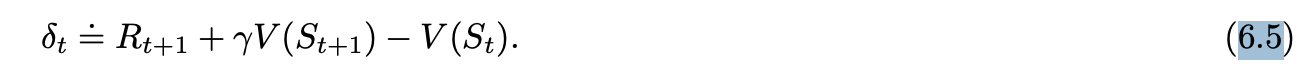

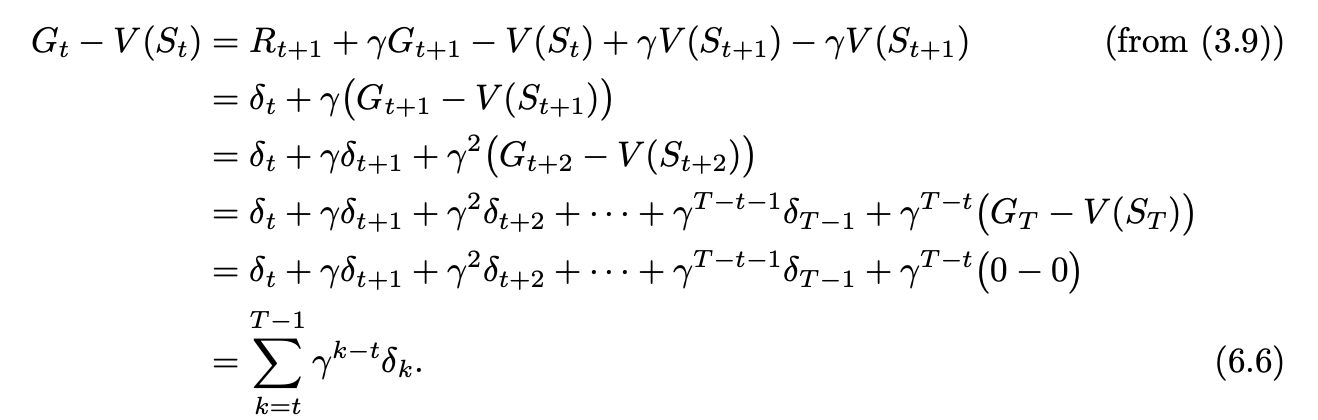

Exercise 7.8

Want to show that 
$$
G_{t:h}\doteq\rho_t(R_{t+1}+G_{t+1:h})+(1-\rho)V_{h-1}(S_{t})
$$
and
$$
G_{h:h}\doteq V_{h-1}(S_h)
$$

also equals some sum of TD errors from 6.5. 

I think a good approach would be to start at $G_{h:h}$ and work backwards to $G_t$. So assuming that then:

$$
G_{h-1:h} = \rho_{h-1}(R_{h}+\gamma V(S_h))+(1-\rho_{h-1})V(S_{h-1})
$$

Also I've removed the time indexing (h) becaus ewe can assume the state-values aren't changing. So now I think we add a $V(S_{h-1})$ identity:
$$
G_{h-1:h} = \rho_{h-1}(R_{h}+\gamma V(S_h)+V(S_{h-1})-V(S_{h-1}))+(1-\rho)V(S_{h-1})
$$

Now we group in into a TD error:
$$
G_{h-1:h} = \rho_{h-1}(\delta_{h-1}+V(S_{h-1}))+(1-\rho_{h-1})V(S_{h-1})
\\
= \rho_{h-1}\delta_{h-1}+\rho_{h-1}V(S_{h-1})+V(S_{h-1})-\rho_{h-1}V(S_{h-1})
$$

Now if we expand the brackets then we have two $\rho_{h-1}V(S_{h-1})$ that cancel out!

$$
G_{h-1:h}= \rho_{h-1}\delta_{h-1}+V(S_{h-1})
$$

Then we plug this into $G_{h-2:h}$

$$
G_{h-2:h} = \rho_{h-2}(R_{h-1}+\gamma (\rho_{h-1}\delta_{h-1}+V(S_{h-1})))+(1-\rho_{h-2})V(S_{h-2})
$$

Expand for clarity:

$$
G_{h-2:h} = \rho_{h-2}(R_{h-1}+\gamma\rho_{h-1}\delta_{h-1}+\gamma V(S_{h-1}))+(1-\rho_{h-2})V(S_{h-2})
$$

Now add in the identity again:

$$
G_{h-2:h} = \rho_{h-2}(R_{h-1}+\gamma\rho_{h-1}\delta_{h-1}+\gamma V(S_{h-1})+V(S_{h-2}-V(S_{h-2})))+(1-\rho_{h-2})V(S_{h-2})
$$

And group again:

$$
G_{h-2:h} = \rho_{h-2}(\gamma\rho_{h-1}\delta_{h-1}+ \delta_{h-2}+V(S_{h-2}))+(1-\rho_{h-2})V(S_{h-2})
$$

Then expand again
$$
G_{h-2:h} = \rho_{h-2}\rho_{h-1}\delta_{h-1}+\rho_{h-2}\delta_{h-2}+\rho_{h-2}V(S_{h-2})+V(S_{h-2})-\rho_{h-2}V(S_{h-2})
$$

And cancel again
$$
G_{h-2:h} = \rho_{h-2}\rho_{h-1}\delta_{h-1}+\rho_{h-2}\delta_{h-2}+V(S_{h-2})
$$

And this naturally goes all the way back to t:

$$
G_{t:h} = V(S_t) + \sum_{i=t}^{t+h} \delta_i \prod_t^{i+t}\rho_i
$$

I was actually quite close to the final solution, but my indexing was slightly off and I also forgot about discounting.

$$
G_{t:h} = V(S_t) + \sum_{k=t}^{h-1}\gamma^{k-t}(\prod^k_{j=t}\rho_j)\delta_k
$$

Exercise 7.9

Want to prove that:

$$
G_{t:h}\doteq R_{t+1}+\gamma (\rho_{t+1}G_{t+1:h}+\bar{V}_{h-1}(S_{t+1})-\rho_{t+1}Q_{h-1}(S_{t+1},A_{t+1}))

\\

= R_{t+1}+\gamma \rho_{t+1}(G_{t+1:h}-Q_{h-1}(S_{t+1},A_{t+1}))+\gamma \bar{V}_{h-1}(S_{t+1}), t<h\leq T
$$

Is equal to a summation involving:
$$
\delta_k = R_{t+1} + \gamma \sum_a \pi(a|S_t) Q(S_{t+1}, a) - Q(S_{t}, A_t)
$$

I think we'll go with the second formulation of the control variate q value equation. We'll also assume the case where h < T, so not at the terminal state yet. Like 7.8, we'll start at $G_{h:h}$ and work backwards. I'm also assuming the q values will remain unchanged, so we don't need to worry about time indexing. So:

$$
G_{h:h} = Q_{h-1}(S_h, A_h)
$$

Then we stick this into $G_{h-1:h}$

$$
G_{h-1:h}=R_{t+1}+\gamma \rho_{t+1}(Q(S_h, A_h)-Q(S_{t+1},A_{t+1})) + \gamma \bar{V}_{h-1}(S_{t+1})
$$

We'll expand $\bar{V}$ to match our TD error:

$$
G_{h-1:h}=R_{h}+\gamma \rho_{h}(Q(S_h, A_h)-Q(S_{h},A_{h})) + \gamma \sum_a \pi(a|S_h) Q(S_h, a)
$$

This is good, but we need $Q(S_{h-1}, A_{h-1})$ somewhere so then we have $Q(S_{t}, A_t)$ from out TD error, so we'll add that identity:

$$
G_{h-1:h}=R_{h}+\gamma \rho_{h}(Q(S_h, A_h)-Q(S_{h},A_{h})) + \gamma \sum_a \pi(a|S_h) Q(S_h, a) + Q(S_{h-1}, A_{h-1}) - Q(S_{h-1}, A_{h-1})
$$

And now we'll expand the brackets:
$$
G_{h-1:h}=R_{h}+\gamma \rho_{h}Q(S_h, A_h) - \gamma \rho_{h} Q(S_{h},A_{h}) + \gamma \sum_a \pi(a|S_h) Q(S_h, a) + Q(S_{h-1}, A_{h-1}) - Q(S_{h-1}, A_{h-1})
$$

We can actually just cancel out the two first Q values:
$$
G_{h-1:h}=R_{h}+ \gamma \sum_a \pi(a|S_h) Q(S_h, a) + Q(S_{h-1}, A_{h-1}) - Q(S_{h-1}, A_{h-1})
$$

Then group our TD error and we're left with:
$$
G_{h-1:h}=\delta_h+Q(S_{h-1}, A_{h-1})
$$

Alright that looks good, let's put this into $G_{h:h-2}$
$$
G_{h-2:h}=R_{h-1}+\gamma\rho_{h-1}(\delta_h+Q(S_{h-1}, A_{h-1})-Q(S_{h-1},A_{h-1}))+ \gamma \sum_a \pi(a|S_{h-1}) Q(S_{h-1}, A_{h-1})
$$

Interesting, the Q values will cancel out again giving:
$$
G_{h-2:h}=R_{h-1}+\gamma\rho_{h-1}(\delta_h)+ \gamma \sum_a \pi(a|S_{h-1}) Q(S_{h-1}, A_{h-1})
$$

We'll need to add the identity again
$$
G_{h-2:h}=R_{h-1}+\gamma\rho_{h-1}\delta_h + \gamma \sum_a \pi(a|S_{h-1}) Q(S_{h-1}, A_{h-1}) + Q(S_{h-2}, A_{h-2}) - Q(S_{h-2}, A_{h-2})
$$

Now we'll group again
$$
G_{h-2:h}=\gamma\rho_{h-1}\delta_h + \delta_{h-1} + Q(S_{h-2}, A_{h-2})
$$

Left with something very similiar to the first time around, and it's also quite similar to the state-value version from exercise 7.8

I'm guessing it'll look like:

$$
G_{t:h}=Q(S_t, A_t) + \sum_{k=t}^{h-1}\gamma^{k-t} (\prod_{j=t}^k \rho_j) \delta_k
$$



Exercise 7.10

This is asking to compare off-policy methods. One without control variates (simpler) and one that uses them. I'll try this once we have another concrete programming exercise.

Overall, control variates are not the only way to reduce variance for off-policy TD methods, there exists are methods. But the conclusion here is that each method may not be the best and there may be ways to further improve them.

## 7.5 Off-policy Learning without importance sampling: n-step tree backup

This is an interesting approach. Instead of using importance sampling ratios, we use the actions that weren't taken to come up with our new return.

What this means can be illustrated by the following backup diagram:

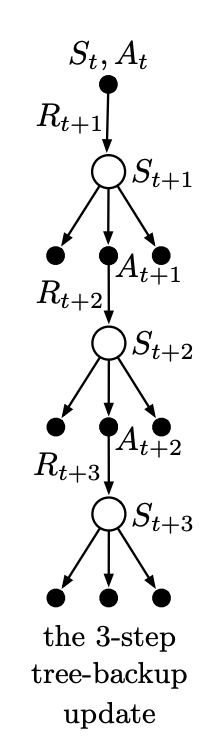

So the goal here is to get the return for $S_t, A_t$. We're going to do this by, like normally, using the reward and subsequent action-values. But how they're used is a lot differently than in importance sampling. Essentially, we're going to use the leaves (and rewards) from the backup diagram to come up with our return.

We're going to sum up most the q values in this backup diagram, weighting each by their corresponding probability under $\pi$. But the actions that were actually taken don't contribute. So for the first step ($S_{t+1}, A_{t+1}$), the sum would have this: $\pi(a|S_{t+1})Q(S_{t+1}, a)$ as a component for all actions that were NOT taken. Then, for subsequent actions taken after $t+1$, we weigh these sums of action values by the probability of taking the previous action under $\pi$. It's also important to note that for the last state, all actions are treated as if they weren't taken, so they all used.

I believe it's easier to show this concept using the equations, this is for t < T-1.

$$
G_{t:t+1} \doteq R_{t+1} + \gamma\sum_a\pi(a|S_{t+1})Q_t(S_{t+1},a)
$$

See this slightly confused me at first, but since it's only the return for the next step, we use all action-values because we haven't taken in actions yet. So it's literally Expected sarsa.

For steps after this, we can more clearly see how the algorithm works for t < T-2:

$$
G_{t:t+2}\doteq R_{t+1}+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q_{t+1}(S_{t+1},a) +\\ \gamma\pi(A_{t+1}|S_{t+1})(R_{t+1}+\gamma\sum_a\pi(a|S_{t+2})Q_{t+1}(S_{t+2},a))
\\
= R_{t+1}+\gamma\sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q_{t+1}(S_{t+1},a)+\gamma\pi(A_{t+1}|S_{t+1})G_{t+1:t+2}
$$

We can start to see a recursive definition of the return:

$$
G_{t:t+n}\doteq R_{t+1}+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q_{t+n-1}(S_{t+1},a)+\gamma\pi(A_{t+1}|S_{t+1})G_{t+1:t+n}
$$

Conditioned by t < T-1, $n\geq 2$. n=1 is of course just expected sarsa, with the exception being $G_{T_1:t+n}\doteq R_T$.

Our update rule is just the same as n-step Sarsa:
$$
Q_{t+n}(S_t, A_t)=Q_{t+n-1}(S_t,A_t)+\alpha[G_{t:t+n} - Q_{t+n-1}(S_t,A_t)]
$$

And of course, $Q_{t+n}(s,a)=Q_{t+n-1}(s,a)$ remains unchanged for all action-values not being updated during this exact update, so $s\neq S_t \ or \ a\neq A_t$


Exercise 7.11

We want to prove
$$
G_{t:t+n}=Q(S_t,A_t)+\sum^{\min(t+n-1,T-1)}_{k=t}\delta_k \sum^k_{i=t+1}\gamma \pi(A_i|S_i)
$$
Where
$$
\delta_t\doteq R_{t+1}+\gamma \bar{V}_t(S_{t+1})-Q(S_t,A_t)
$$
And
$$
\bar{V}_t(s)=\sum_a \pi(a|s)Q(s, a)
$$

We know $G_{t:t+1}$ is just $R_{t+1}+\gamma \bar{V}(S_{t+1})$

So $G_{n:n}$ must be $\bar{V}(S_n)$
$$
G_{n:n}=\bar{V}(S_n)
$$

$$
G_{n-1:n}=R_{n}+\gamma \bar{V}(S_n)
$$

Then

$$
G_{n-2:n}=R_{n-1}+\gamma \sum_{a\neq A_{n-1}}\pi(a|S_{n-1})Q(S_{n-1},a)+\gamma \pi(S_{n-1}|A_{n-1})(R_n+\gamma\bar{V}(S_n))
$$

Not entirely sure what to do here, I'll trying adding the $Q(S_{n-1}, A_{n-1})$ Identity inside the right brackets.

$$
G_{n-2:n}=R_{n-1}+\gamma \sum_{a\neq A_{n-1}}\pi(a|S_{n-1})Q(S_{n-1},a)+\gamma \pi(S_{n-1}|A_{n-1})(R_n+\gamma\bar{V}(S_n)+Q(S_{n-1}, A_{n-1})-Q(S_{n-1}, A_{n-1}))
$$

Then we'll get our TD error
$$
G_{n-2:n}=R_{n-1}+\gamma \sum_{a\neq A_{n-1}}\pi(a|S_{n-1})Q(S_{n-1},a)+\gamma \pi(S_{n-1}|A_{n-1})(\delta_n + Q(S_{n-1}, A_{n-1}))
$$

I'm not sure how we deal with that summation.

After ChatGPTing, this is not the correct approach because the summation isn't structured. 

The first thing we note is that $\bar{V}(S_{k+1})$ can be defined specially here.

That is:
$$
\bar{V}(S_{k+1})=\sum_a \pi(a|S_{k+1})Q(S_{k+1},a)=\pi(A_{k+1}|S_{k+1})Q(S_{k+1}, A_{k+1})+\sum_{a\neq A_{k+1}}\pi(a|S_{k+1})Q({S_{k+1},a})
$$

We can see that this is obvious because it's just adding the weighted Q values to all the other weighted Q values. This will help us with cancelling out the annoying unstructured summation.

Ok so now for the proof. We first write out the recursive definition of the n-step tree backup:
$$
G_{t:t+n}=R_{t+1}+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q(S_{t+1},a)+\gamma \pi(A_{t+1}, S_{t+1})G_{t+1:t+n}
$$

Now we subtract $Q(S_t, A_t)$ from both sides, this will help with getting the TD error:
$$
G_{t:t+n}-Q(S_t, A_t)=R_{t+1}+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q(S_{t+1},a)+\gamma \pi(A_{t+1}, S_{t+1})G_{t+1:t+n}-Q(S_t, A_t)
$$

Now we add and subtract $\gamma \bar{V}(S_{t+1})$ but we subtract it using the special form from above and add it regularly:
$$
G_{t:t+n}-Q(S_t, A_t)=R_{t+1}+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q(S_{t+1},a)+\gamma \pi(A_{t+1}, S_{t+1})G_{t+1:t+n}-Q(S_t, A_t)-(\gamma \pi(A_{t+1}|S_{t+1})Q(S_{t+1}, A_{t+1})+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q({S_{t+1},a}))+\gamma \bar{V}(S_{t+1})
$$

Now the two annoying summations cancel out:
$$
G_{t:t+n}-Q(S_t, A_t)=R_{t+1}+\gamma \pi(A_{t+1}, S_{t+1})G_{t+1:t+n}-Q(S_t, A_t)-\gamma \pi(A_{t+1}|S_{t+1}) Q(S_{t+1}, A_{t+1})+\gamma \bar{V}(S_{t+1})
$$

And we can get our TD error:
$$
G_{t:t+n}-Q(S_t, A_t)=\delta_t+\gamma \pi(A_{t+1}, S_{t+1})G_{t+1:t+n}-\gamma \pi(A_{t+1}|S_{t+1}) Q(S_{t+1}, A_{t+1})
$$

We can also factor out $\pi(A_{t+1}|S_{t+1})$ and $\gamma$:
$$
G_{t:t+n}-Q(S_t, A_t)=\delta_t+\gamma\pi(A_{t+1}, S_{t+1})(G_{t+1:t+n}-Q(S_{t+1}, A_{t+1}))
$$

Now we can add back our $Q(S_t, A_t)$ for a full value for $G_{t:t+n}$
$$
G_{t:t+n}=Q(S_t, A_t)+\delta_t+\gamma\pi(A_{t+1}, S_{t+1})(G_{t+1:t+n}-Q(S_{t+1}, A_{t+1}))
$$

Now of course we can just keep repeating this process by expanding out $G_{t+1:t+n}$, but I think we get the idea.

Here we have the full algorithm for n-step tree backup:

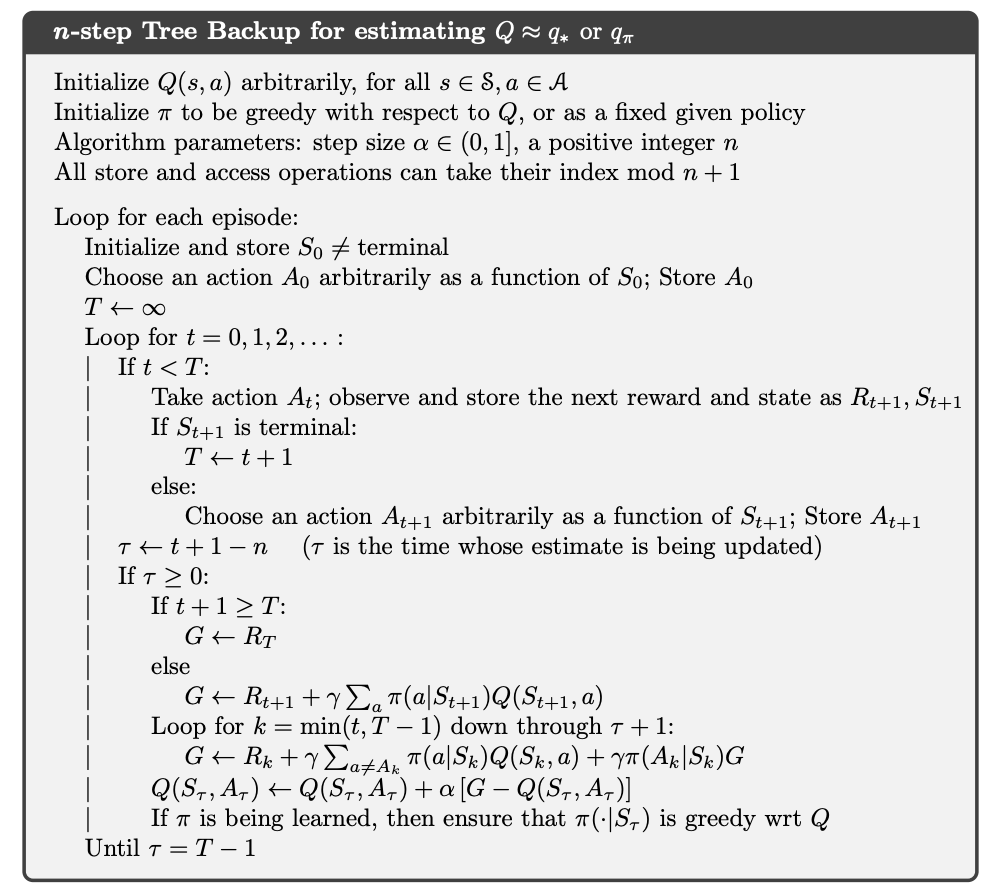

## 7.6 *A Unifying Algorithm: n-step Q($\sigma$)

There is a way of unifying all the n-step algorithms we've been discussing. The idea of this would be to get the best of all of each algorithms benefits. And it's fairly simple. We add another parameter sigma, $\sigma$, that control how much of each algorithm we use. In a similar way to what we did with state-value control variates. So $\sigma$ is just some value $\sigma_t \in [0, 1]$.

To see how our new return is derived, let's go through it. We first start with the tree-backup n-step return:

$$
G_{t:h}=R_{t+1}+\gamma \sum_{a\neq A_{t+1}}\pi(a|S_{t+1})Q_{h-1}(S{t+1},a)+\pi(A_{t+1}, S_{t+1})G_{t+1:h}
$$

We then write this in terms of $\bar{V}$, of course the term just after $\bar{V}$ is there because it's apart of the expected state-value, but with tree-backup, we don't want it.

$$
=R_{t+1}+\gamma\bar{V}_{h-1}(S_{t+1})-\gamma \pi(A_{t+1}|S_{t+1})Q_{h-1}(S_{t+1},A_{t+1})+\gamma\pi(A_{t+1}|S_{t+1})G_{t+1:h}
$$

Now we factor out $\gamma \pi$, this gives us something that looks quite similiar to the action-value control variate return, except for $\pi(A_{t+1}|S_{t+1})$ instead of our importance sampling ratio:

$$
=R_{t+1}+\gamma\pi(A_{t+1}|S_{t+1})(G_{t+1:h}Q_{h-1}(S_{t+1},A_{t+1}))+\gamma \bar{V}_{h-1}(S_{t+1})
$$

Now for our modification which makes it $Q(\sigma)$, we add our linear slider parameter $\sigma$:

$$
G_{t:h}\doteq R_{t+1} + \gamma(\sigma_{t+1}\rho_{t+1}+(1-\sigma_{t+1})\pi(A_{t+1}|S_{t+1}))(G_{t+1:h}-Q_{h-1}(S_{t+1},A_{t+1}))+\gamma\bar{V}_{h-1}(S_{t+1})
$$

Interestingly, we add back the one-step importance sampling ratio. So our slider theta, essentially allows us to choose a mix between using an importance sampling ratio or using $\pi$. I wonder what the benefits of using one over the other would be.

Here we have the full algorithm:

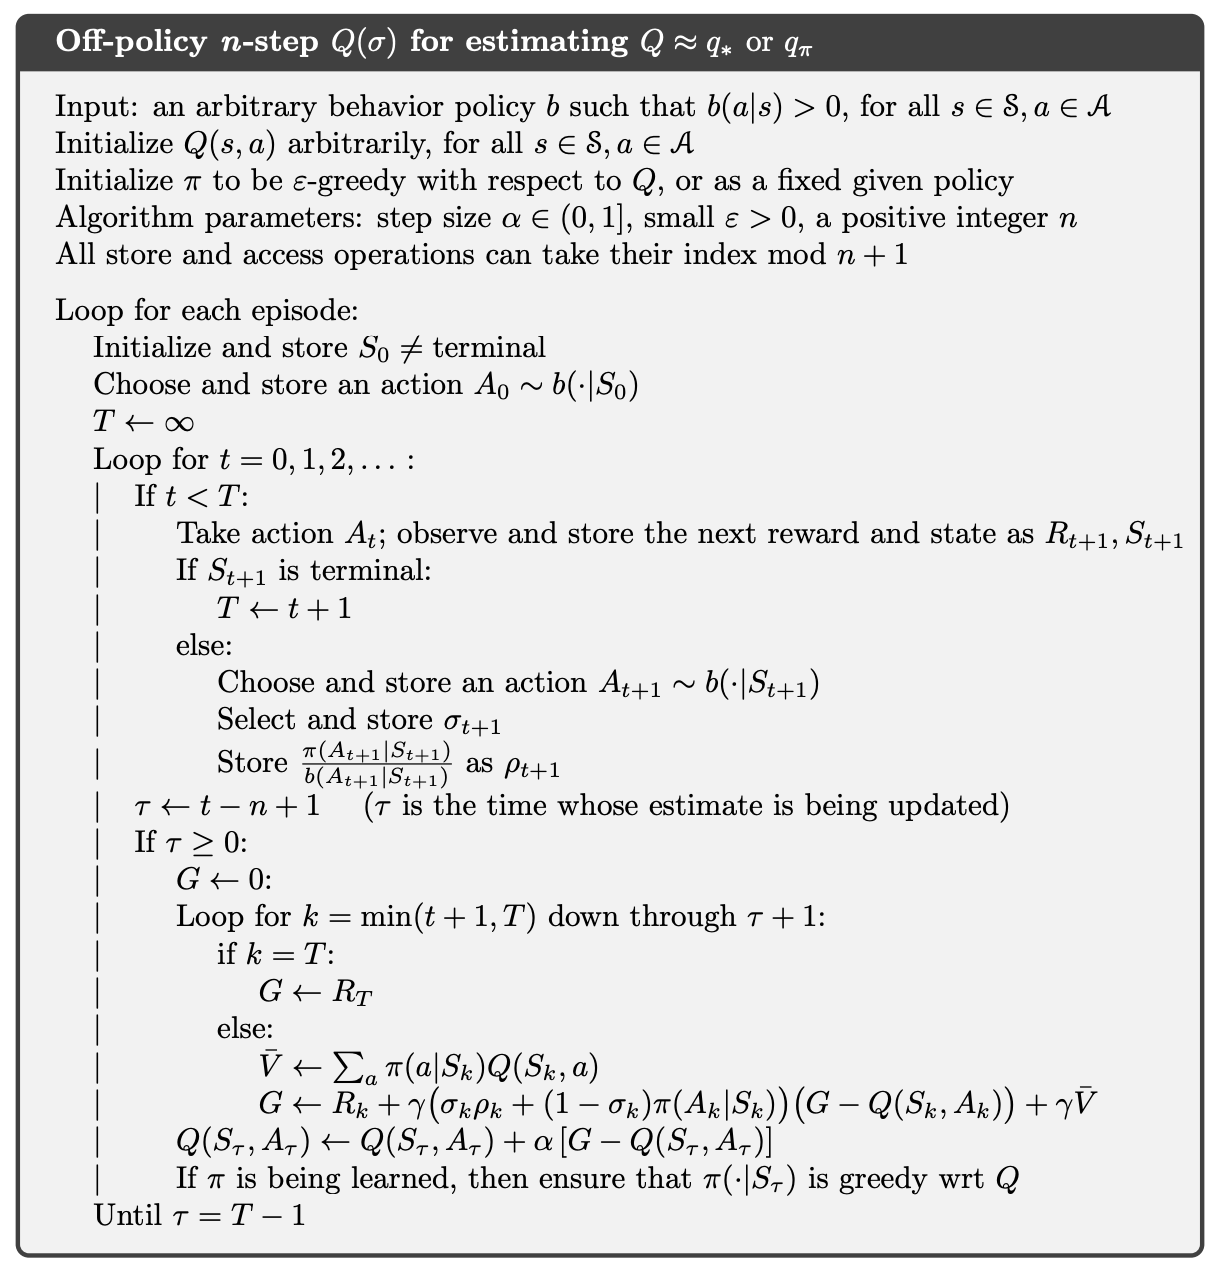